In [7]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
#calculating the Shannon entropy of the text

text_file = open('tempest.txt', 'r')
data_text = text_file.read()
text_file.close()

total_len = len(data_text)

text = [c.lower() for c in data_text]

char_list = list(set(data_text.lower()))  # get the unique characters in the text

occ_dict = {c: data_text.lower().count(c) for c in char_list} # get the number of occurrences of each character
prob_dict = {c: data_text.lower().count(c)/total_len for c in char_list}  # get the probability of each character


In [49]:
def entropy(p):
    idx = np.where(p>0)
    H = -np.sum(np.multiply(p[idx], np.log2(p[idx])))
    return H

def entropy_emp(p,n):
    idx = np.where(p>0)
    h = -np.sum(np.multiply(p[idx],np.log2(p[idx])))
    eh = np.sqrt(np.sum(np.multiply(np.square(np.log2(np.e*p)), np.multiply(p,1-p))/n)) 
    return h,eh
    
    
def KLdivergence(p,q):
    idx = np.where(p>0)
    return np.sum(np.nan_to_num(np.multiply(p[idx],np.log2(p[idx]))))-\
            np.sum(np.nan_to_num(np.multiply(p[idx],np.log2(q[idx]))))


def mutual_information(pxy):
    px = np.sum(pxy,axis=0)
    py = np.sum(pxy,axis=1)
    hx = entropy(px)
    hy = entropy(py)
    hxy = entropy(pxy.reshape(-1))
    MI = hx+hy-hxy
    hxcy = hx-MI
    hycx = hy-MI
    return MI,hx,hy

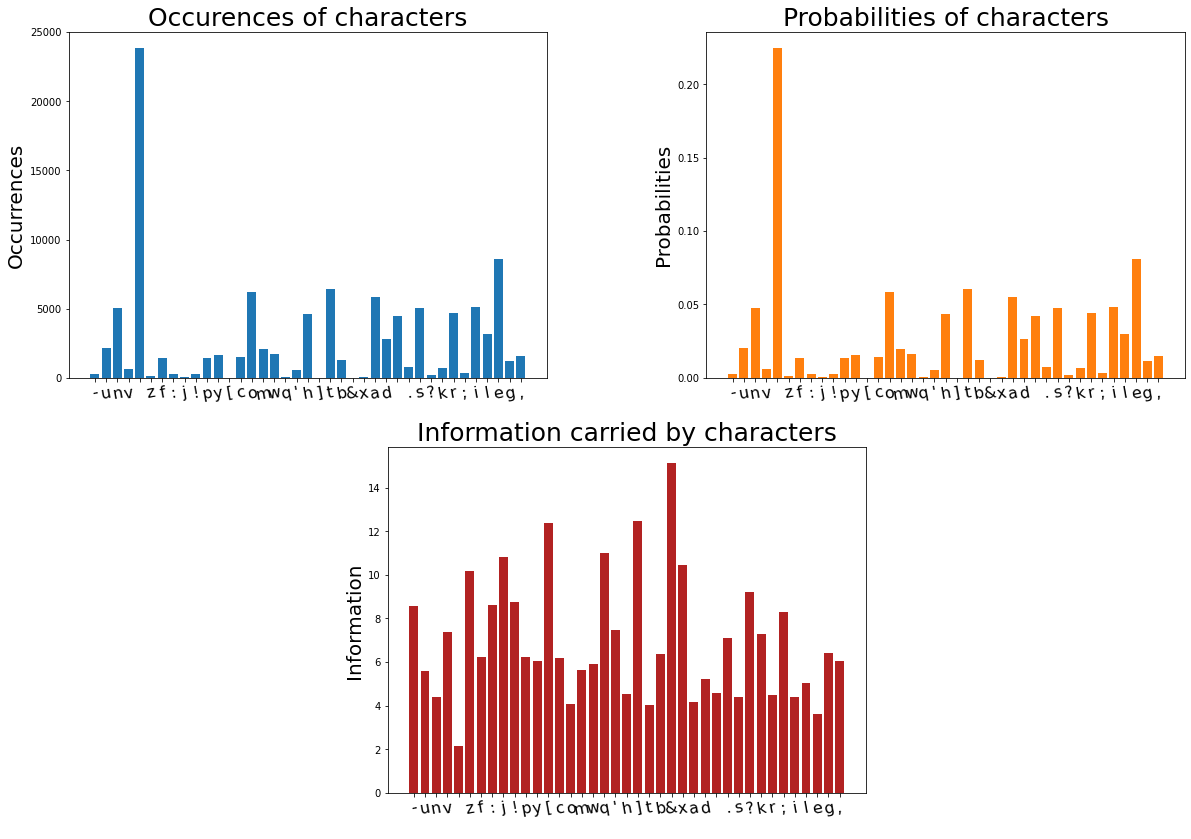

In [50]:
import matplotlib.gridspec as gridspec

gs =gridspec.GridSpec(2,4)
gs.update(wspace = 1)
ax1 = plt.subplot(gs[0,:2], )
ax2 = plt.subplot(gs[0,2:])
ax3 = plt.subplot(gs[1,1:3])


#fig , ax = plt.subplots(1 , 2, figsize=(20,8))

ax1.bar(list(occ_dict.keys()), occ_dict.values())
ax1.set_title("Occurences of characters", fontsize=25)
ax1.set_ylabel("Occurrences" , fontsize=20)
ax1.tick_params(axis='x', which='major', labelsize=16, rotation=10 )




ax2.bar(list(prob_dict.keys()), prob_dict.values(), color='C1')
ax2.set_title("Probabilities of characters", fontsize=25)
ax2.set_ylabel("Probabilities" , fontsize=20)
ax2.tick_params(axis='x', which='major', labelsize=16, rotation=10 )




df = pd.DataFrame.from_dict(prob_dict, orient='index', columns=['Prob'])
df['Information'] = -np.log2(df['Prob'])

ax3.bar(list(df.index) , df['Information'], color='firebrick') 
ax3.set_title("Information carried by characters", fontsize=25)
ax3.set_ylabel("Information" , fontsize=20)

ax3.tick_params(axis='x', which='major', labelsize=16, rotation=10 )

plt.rcParams["figure.figsize"]=(20,14)


In [51]:
def shannon_entr(prob):
    idx = np.where(prob>0)
    H = -np.sum(prob[idx]*np.log2(prob[idx]))
    return H

def entr_err(prob, n):
    er = np.sqrt( np.sum( (np.log2(np.e*prob))**2 * prob * (1 - prob) /n))
    return er
    
    
def KLdivergence(p,q):
    idx = np.where(p>0)
    return np.sum(np.nan_to_num((p[idx]*np.log2(p[idx]))))-\
            np.sum(np.nan_to_num((p[idx]*np.log2(q[idx]))))
            

def mutual_information(pxy):
    px = np.sum(pxy,axis=0)
    py = np.sum(pxy,axis=1)
    hx = shannon_entr(px) 
    hy = shannon_entr(py) 
    hxy = shannon_entr(pxy.reshape(-1))  #reshape to 1D array
    MI = hx + hy - hxy          #Mutual information MI(X;Y) = H[X] + H[Y] - H[X,Y]
    hxcy = hx - MI              #Conditional entropy H[X|Y] = H[X] - MI(X;Y)
    hycx = hy - MI              #Conditional entropy H[Y|X] = H[Y] - MI(X;Y)
    return MI, hx, hy



In [52]:
shan = shannon_entr(np.array(list(prob_dict.values())))

err = entr_err(np.array(list(prob_dict.values())), total_len)
    

In [53]:
print('The Shannon Entropy of the text is:  H = %2.4f ± %2.4f'  %(shan, err)  )

The Shannon Entropy of the text is:  H = 4.2296 ± 0.0095


In [69]:
L = 30
N = total_len
auto_mi = np.zeros(L)

characters  = np.unique(text)
n = len(char_list)


for l in range(1,L+1):
    text1 = data_text[:-l]
    text2 = data_text[l:]
    text3 = [text1[i]+text2[i] for i in range(N-l)]
    
    character_pairs, occurrences_pairs_nonzero = np.unique(text3, return_counts=True)
    
        
    occurrences_pairs = np.zeros((n,n))
    
    for i in range(n):
        ci = characters[i]
        for j in range(n):
            cj = characters[j]
            c = ci+cj
            idx = np.where(character_pairs==c)[0]
            if len(idx)>0:
                occurrences_pairs[i,j]=np.squeeze(occurrences_pairs_nonzero[idx])

    occurrences_pairs=occurrences_pairs/(N-l)
  
    auto_mi[l-1],hx,hy = mutual_information(occurrences_pairs)
    


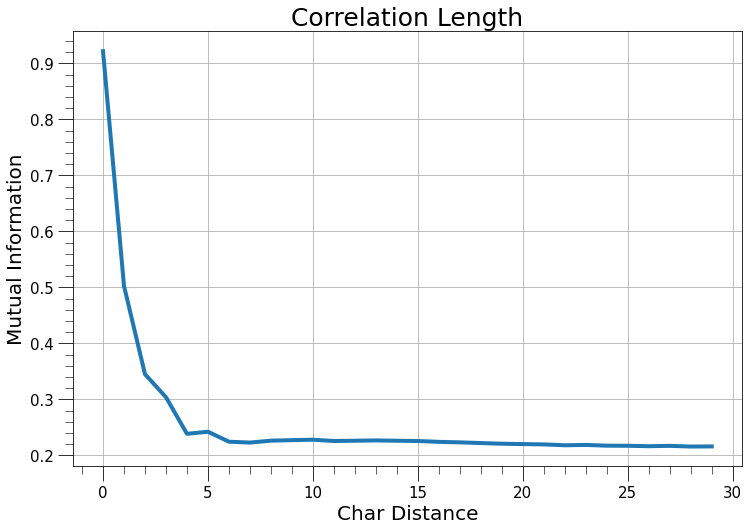

In [70]:
import matplotlib

# plotting the result
fig , ax = plt.subplots(figsize=(12,8))

ax.plot(auto_mi, linewidth = 4)    # plot N - consumer to t 

ax.set_title('Correlation Length', fontsize = 25)    
ax.set_xlabel('Char Distance', fontsize = 20)
ax.set_ylabel('Mutual Information', fontsize = 20)         

#ax.legend(shadow=True, edgecolor='black', facecolor='aliceblue', fontsize=20 , loc ='best')


ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
ax.tick_params(axis='both', which='major', labelsize=15, length=15)
ax.tick_params(axis='both', which='minor', labelsize=15, length=8)
ax.grid(zorder = 1)
ax.minorticks_on()

In [66]:
text_subsampled = [text[i] for i in range(1,N,10)]

characters_sub, occurrences_sub = np.unique(text_subsampled, return_counts=True)
Nsub = len(text_subsampled)
probs = occurrences_sub/Nsub


Hsub, Ersub = shannon_entr(probs) , entr_err(probs,Nsub)

print('The Shannon Entropy of the text is:  H = %2.4f ± %2.4f'  %(shan, err)  )

print('\nThe Shannon Entropy of the sub-sampled text is:  H = %2.4f ± %2.4f'  %(Hsub, Ersub)  )

The Shannon Entropy of the text is:  H = 4.2296 ± 0.0095

The Shannon Entropy of the sub-sampled text is:  H = 4.2294 ± 0.0301
